In [1]:
from analysis import *
from docking_analysis import *
from IPython.display import Markdown

file_paths = {0: 'single_classification_22/45540945/',
              1: 'single_classification_42/45539118/', 
              2: 'single_regression_2/45540957/',
              3: 'single_regression_11/45540958/',
              4: 'tree_net/classification/',
              5: 'tree_net/regression/',
              6: 'multi_classification_3/45550779/',
              7: 'multi_classification_7/45555017/',
              8: 'sklearn_rf_389687_96/',
              9: 'sklearn_rf_389687_97/',
              10: 'result_FP_ROCAUC_5fold/',
              11: 'result_FP_EFR1_5fold/'}

number = 20

evaluations = {0: 'train prec', 1: 'train roc', 2: 'train bedroc',
               3: 'val prec', 4: 'val roc', 5: 'val bedroc',
               6: 'test prec', 7: 'test roc', 8: 'test bedroc',
               9: 'EF_2', 10: 'EF_1', 11: 'EF_015', 12: 'EF_01'}

paths = ['../../output/cross_validation/{}'.format(p) for p in file_paths.values()]
model_list = ['single_classification_22',
              'single_classification_42',
              'single_regression_2',
              'single_regression_11',
              'tree_net_classification',
              'tree_net_regression',
              'multi_classification_3',
              'multi_classification_7',
              'random_forest_96',
              'random_forest_97',
              'light_chen_ROC',
              'light_chem_EF1']

In [2]:
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
for k in range(len(paths)):
    print 'Check ', file_paths[k]
    check_result_completeness(dir_='../../output/cross_validation/', file_path=file_paths[k], number=number)
    print

Check  single_classification_22/45540945/
All output result complete.

Check  single_classification_42/45539118/
All output result complete.

Check  single_regression_2/45540957/
All output result complete.

Check  single_regression_11/45540958/
All output result complete.

Check  tree_net/classification/
All output result complete.

Check  tree_net/regression/
All output result complete.

Check  multi_classification_3/45550779/
All output result complete.

Check  multi_classification_7/45555017/
All output result complete.

Check  sklearn_rf_389687_96/
All output result complete.

Check  sklearn_rf_389687_97/
All output result complete.

Check  result_FP_ROCAUC_5fold/
All output result complete.

Check  result_FP_EFR1_5fold/
All output result complete.



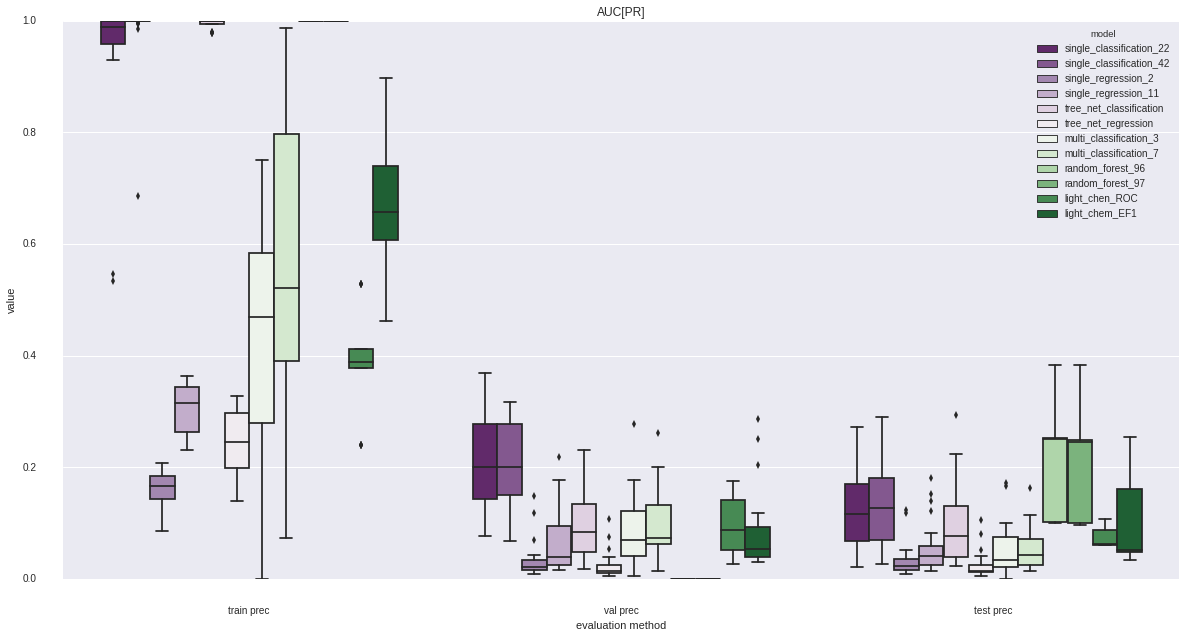

In [5]:
plot_cross_validation(paths,
                      evaluation_list=[evaluations[0], evaluations[3], evaluations[6]],
                      model_list=model_list,
                      title='AUC[PR]')

In [6]:
mean_content, median_content, std_content = table_cross_validation(paths,
                                                                   evaluation_list=[evaluations[0], evaluations[3], evaluations[6]],
                                                                   model_list=model_list,
                                                                   evaluation_mode='AUC[PR]')
content = '{}\n{}\n{}'.format(mean_content, median_content, std_content)
Markdown(content)

## Model comparison
### mean of AUC[PR]
| model | train prec | val prec | test prec |
| --- | --- | --- | --- |
| single_classification_22 | 0.937 | 0.218 | 0.124 |
| single_classification_42 | 0.983 | 0.208 | 0.134 |
| single_regression_2 | 0.160 | 0.035 | 0.034 |
| single_regression_11 | 0.305 | 0.067 | 0.058 |
| tree_net_classification | 0.995 | 0.099 | 0.099 |
| tree_net_regression | 0.244 | 0.025 | 0.025 |
| multi_classification_3 | 0.424 | 0.085 | 0.053 |
| multi_classification_7 | 0.579 | 0.097 | 0.053 |
| random_forest_96 | 1.000 | 0.000 | 0.218 |
| random_forest_97 | 1.000 | 0.000 | 0.215 |
| light_chen_ROC | 0.389 | 0.093 | 0.075 |
| light_chem_EF1 | 0.673 | 0.087 | 0.110 |

## Model comparison
### median of AUC[PR]
| model | train prec | val prec | test prec |
| --- | --- | --- | --- |
| single_classification_22 | 0.988 | 0.200 | 0.116 |
| single_classification_42 | 1.000 | 0.200 | 0.126 |
| single_regression_2 | 0.167 | 0.021 | 0.022 |
| single_regression_11 | 0.316 | 0.038 | 0.041 |
| tree_net_classification | 1.000 | 0.084 | 0.078 |
| tree_net_regression | 0.246 | 0.014 | 0.015 |
| multi_classification_3 | 0.469 | 0.069 | 0.033 |
| multi_classification_7 | 0.521 | 0.073 | 0.042 |
| random_forest_96 | 1.000 | 0.000 | 0.250 |
| random_forest_97 | 1.000 | 0.000 | 0.244 |
| light_chen_ROC | 0.389 | 0.087 | 0.062 |
| light_chem_EF1 | 0.657 | 0.053 | 0.052 |

## Model comparison
### std of AUC[PR]
| model | train prec | val prec | test prec |
| --- | --- | --- | --- |
| single_classification_22 | 0.138 | 0.087 | 0.073 |
| single_classification_42 | 0.070 | 0.078 | 0.079 |
| single_regression_2 | 0.034 | 0.037 | 0.032 |
| single_regression_11 | 0.046 | 0.061 | 0.050 |
| tree_net_classification | 0.009 | 0.066 | 0.073 |
| tree_net_regression | 0.061 | 0.026 | 0.026 |
| multi_classification_3 | 0.238 | 0.068 | 0.049 |
| multi_classification_7 | 0.261 | 0.063 | 0.038 |
| random_forest_96 | 0.000 | 0.000 | 0.109 |
| random_forest_97 | 0.000 | 0.000 | 0.110 |
| light_chen_ROC | 0.095 | 0.049 | 0.019 |
| light_chem_EF1 | 0.148 | 0.075 | 0.088 |


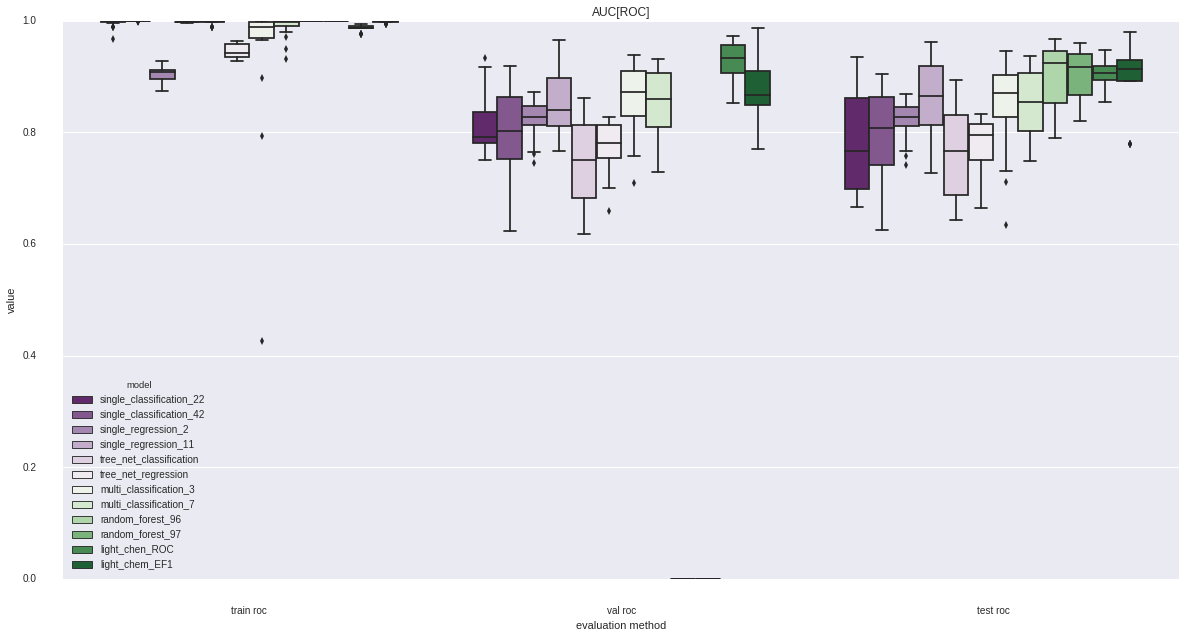

In [7]:
plot_cross_validation(paths,
                      evaluation_list=[evaluations[1], evaluations[4], evaluations[7]],
                      model_list=model_list,
                      title='AUC[ROC]')

In [8]:
mean_content, median_content, std_content = table_cross_validation(paths,
                                                                   evaluation_list=[evaluations[1], evaluations[4], evaluations[7]],
                                                                   model_list=model_list,
                                                                   evaluation_mode='AUC[ROC]')
content = '{}\n{}\n{}'.format(mean_content, median_content, std_content)
Markdown(content)

## Model comparison
### mean of AUC[ROC]
| model | train roc | val roc | test roc |
| --- | --- | --- | --- |
| single_classification_22 | 0.996 | 0.811 | 0.784 |
| single_classification_42 | 1.000 | 0.798 | 0.792 |
| single_regression_2 | 0.904 | 0.822 | 0.823 |
| single_regression_11 | 0.997 | 0.856 | 0.863 |
| tree_net_classification | 0.997 | 0.749 | 0.763 |
| tree_net_regression | 0.946 | 0.776 | 0.777 |
| multi_classification_3 | 0.946 | 0.862 | 0.848 |
| multi_classification_7 | 0.989 | 0.852 | 0.851 |
| random_forest_96 | 1.000 | 0.000 | 0.896 |
| random_forest_97 | 1.000 | 0.000 | 0.901 |
| light_chen_ROC | 0.987 | 0.925 | 0.904 |
| light_chem_EF1 | 0.998 | 0.871 | 0.899 |

## Model comparison
### median of AUC[ROC]
| model | train roc | val roc | test roc |
| --- | --- | --- | --- |
| single_classification_22 | 1.000 | 0.791 | 0.767 |
| single_classification_42 | 1.000 | 0.802 | 0.808 |
| single_regression_2 | 0.907 | 0.828 | 0.828 |
| single_regression_11 | 0.997 | 0.840 | 0.866 |
| tree_net_classification | 1.000 | 0.751 | 0.766 |
| tree_net_regression | 0.942 | 0.782 | 0.796 |
| multi_classification_3 | 0.989 | 0.872 | 0.870 |
| multi_classification_7 | 0.997 | 0.860 | 0.854 |
| random_forest_96 | 1.000 | 0.000 | 0.925 |
| random_forest_97 | 1.000 | 0.000 | 0.917 |
| light_chen_ROC | 0.987 | 0.933 | 0.907 |
| light_chem_EF1 | 0.999 | 0.866 | 0.913 |

## Model comparison
### std of AUC[ROC]
| model | train roc | val roc | test roc |
| --- | --- | --- | --- |
| single_classification_22 | 0.008 | 0.049 | 0.091 |
| single_classification_42 | 0.000 | 0.089 | 0.081 |
| single_regression_2 | 0.014 | 0.033 | 0.034 |
| single_regression_11 | 0.000 | 0.060 | 0.069 |
| tree_net_classification | 0.005 | 0.077 | 0.084 |
| tree_net_regression | 0.012 | 0.046 | 0.047 |
| multi_classification_3 | 0.131 | 0.064 | 0.082 |
| multi_classification_7 | 0.019 | 0.059 | 0.061 |
| random_forest_96 | 0.000 | 0.000 | 0.068 |
| random_forest_97 | 0.000 | 0.000 | 0.052 |
| light_chen_ROC | 0.006 | 0.038 | 0.031 |
| light_chem_EF1 | 0.002 | 0.053 | 0.068 |


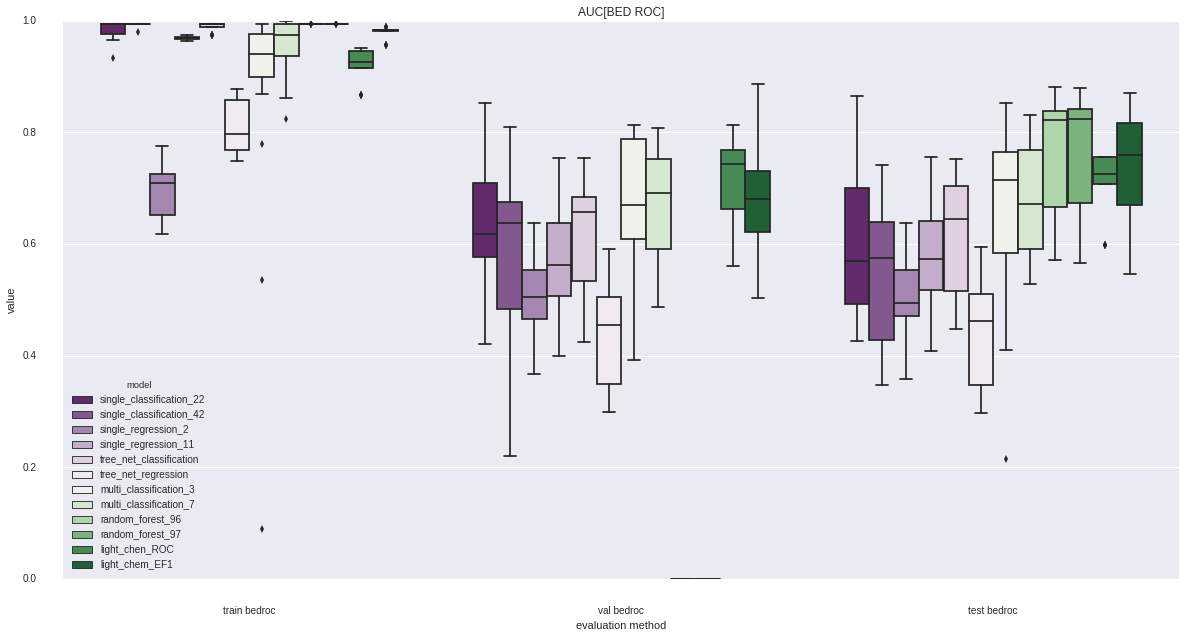

In [9]:
plot_cross_validation(paths,
                      evaluation_list=[evaluations[2], evaluations[5], evaluations[8]],
                      model_list=model_list,
                      title='AUC[BED ROC]')

In [10]:
mean_content, median_content, std_content = table_cross_validation(paths,
                                                                   evaluation_list=[evaluations[2], evaluations[5], evaluations[8]],
                                                                   model_list=model_list,
                                                                   evaluation_mode='AUC[BED ROC]')
content = '{}\n{}\n{}'.format(mean_content, median_content, std_content)
Markdown(content)

## Model comparison
### mean of AUC[BED ROC]
| model | train bedroc | val bedroc | test bedroc |
| --- | --- | --- | --- |
| single_classification_22 | 0.986 | 0.632 | 0.598 |
| single_classification_42 | 0.994 | 0.572 | 0.546 |
| single_regression_2 | 0.699 | 0.508 | 0.507 |
| single_regression_11 | 0.969 | 0.578 | 0.583 |
| tree_net_classification | 0.989 | 0.620 | 0.616 |
| tree_net_regression | 0.810 | 0.442 | 0.446 |
| multi_classification_3 | 0.875 | 0.679 | 0.661 |
| multi_classification_7 | 0.958 | 0.673 | 0.681 |
| random_forest_96 | 0.995 | 0.000 | 0.755 |
| random_forest_97 | 0.995 | 0.000 | 0.757 |
| light_chen_ROC | 0.921 | 0.716 | 0.709 |
| light_chem_EF1 | 0.979 | 0.674 | 0.733 |

## Model comparison
### median of AUC[BED ROC]
| model | train bedroc | val bedroc | test bedroc |
| --- | --- | --- | --- |
| single_classification_22 | 0.995 | 0.619 | 0.570 |
| single_classification_42 | 0.995 | 0.638 | 0.575 |
| single_regression_2 | 0.709 | 0.505 | 0.495 |
| single_regression_11 | 0.969 | 0.562 | 0.574 |
| tree_net_classification | 0.995 | 0.658 | 0.645 |
| tree_net_regression | 0.798 | 0.455 | 0.462 |
| multi_classification_3 | 0.941 | 0.670 | 0.715 |
| multi_classification_7 | 0.974 | 0.691 | 0.671 |
| random_forest_96 | 0.995 | 0.000 | 0.822 |
| random_forest_97 | 0.995 | 0.000 | 0.824 |
| light_chen_ROC | 0.925 | 0.743 | 0.725 |
| light_chem_EF1 | 0.984 | 0.680 | 0.760 |

## Model comparison
### std of AUC[BED ROC]
| model | train bedroc | val bedroc | test bedroc |
| --- | --- | --- | --- |
| single_classification_22 | 0.016 | 0.110 | 0.132 |
| single_classification_42 | 0.003 | 0.161 | 0.127 |
| single_regression_2 | 0.045 | 0.070 | 0.070 |
| single_regression_11 | 0.004 | 0.094 | 0.103 |
| tree_net_classification | 0.009 | 0.099 | 0.102 |
| tree_net_regression | 0.046 | 0.094 | 0.093 |
| multi_classification_3 | 0.212 | 0.112 | 0.154 |
| multi_classification_7 | 0.048 | 0.093 | 0.103 |
| random_forest_96 | 0.000 | 0.000 | 0.120 |
| random_forest_97 | 0.000 | 0.000 | 0.121 |
| light_chen_ROC | 0.031 | 0.074 | 0.060 |
| light_chem_EF1 | 0.012 | 0.100 | 0.118 |


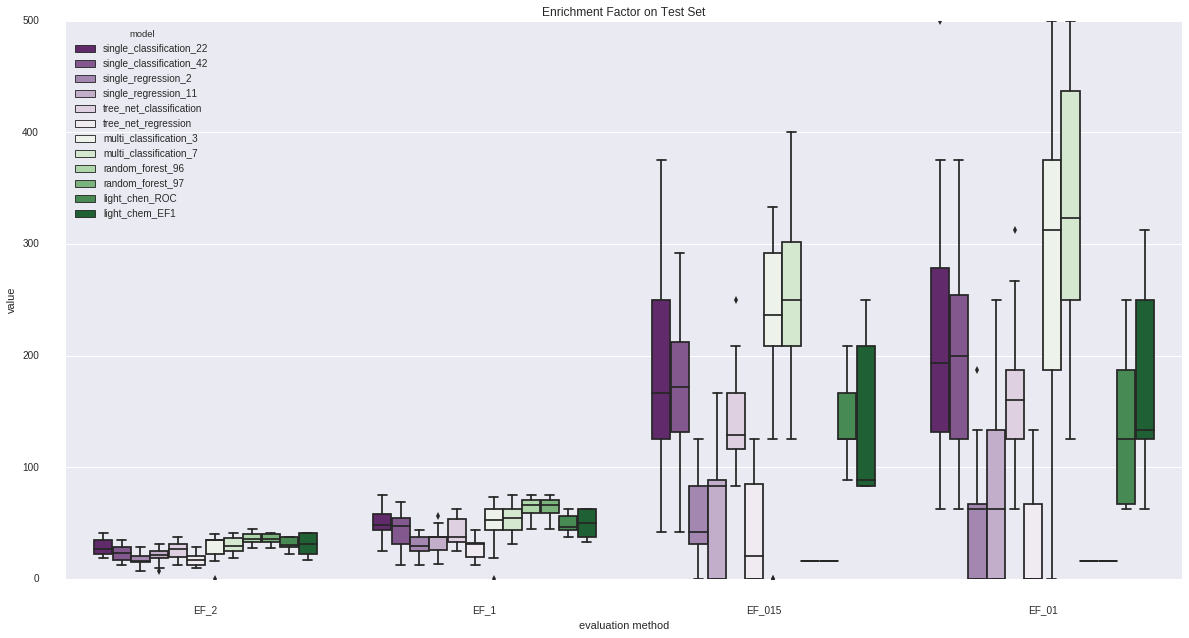

In [11]:
plot_cross_validation(paths,
                      evaluation_list=[evaluations[9], evaluations[10], evaluations[11], evaluations[12]],
                      model_list=model_list,
                      title='Enrichment Factor on Test Set')

In [12]:
mean_content, median_content, std_content = table_cross_validation(paths,
                                                                   evaluation_list=[evaluations[9], evaluations[10], evaluations[11], evaluations[12]],
                                                                   model_list=model_list,
                                                                   evaluation_mode='Enrichment Factor (Test-set)')
content = '{}\n{}\n{}'.format(mean_content, median_content, std_content)
Markdown(content)

## Model comparison
### mean of Enrichment Factor (Test-set)
| model | EF_2 | EF_1 | EF_015 | EF_01 |
| --- | --- | --- | --- | --- |
| single_classification_22 | 27.531 | 50.062 | 177.222 | 211.875 |
| single_classification_42 | 23.281 | 43.437 | 175.278 | 206.042 |
| single_regression_2 | 17.688 | 29.042 | 50.833 | 57.083 |
| single_regression_11 | 20.635 | 33.708 | 65.556 | 79.583 |
| tree_net_classification | 25.802 | 42.729 | 141.250 | 161.250 |
| tree_net_regression | 17.062 | 27.833 | 40.278 | 38.333 |
| multi_classification_3 | 28.583 | 50.188 | 220.972 | 283.958 |
| multi_classification_7 | 29.281 | 54.167 | 255.278 | 328.958 |
| random_forest_96 | 36.064 | 62.984 | 16.000 | 16.000 |
| random_forest_97 | 35.382 | 62.984 | 16.000 | 16.000 |
| light_chen_ROC | 31.000 | 49.333 | 142.778 | 138.333 |
| light_chem_EF1 | 30.208 | 49.167 | 142.778 | 176.667 |

## Model comparison
### median of Enrichment Factor (Test-set)
| model | EF_2 | EF_1 | EF_015 | EF_01 |
| --- | --- | --- | --- | --- |
| single_classification_22 | 26.667 | 48.333 | 166.667 | 193.750 |
| single_classification_42 | 23.438 | 46.875 | 172.222 | 200.000 |
| single_regression_2 | 16.146 | 28.958 | 41.667 | 62.500 |
| single_regression_11 | 20.938 | 37.500 | 83.333 | 62.500 |
| tree_net_classification | 26.562 | 37.500 | 129.167 | 160.417 |
| tree_net_regression | 17.188 | 31.250 | 20.833 | 0.000 |
| multi_classification_3 | 34.375 | 53.125 | 236.111 | 312.500 |
| multi_classification_7 | 29.062 | 54.792 | 250.000 | 322.917 |
| random_forest_96 | 35.366 | 65.909 | 16.000 | 16.000 |
| random_forest_97 | 35.366 | 65.909 | 16.000 | 16.000 |
| light_chen_ROC | 30.000 | 46.667 | 125.000 | 125.000 |
| light_chem_EF1 | 31.250 | 50.000 | 88.889 | 133.333 |

## Model comparison
### std of Enrichment Factor (Test-set)
| model | EF_2 | EF_1 | EF_015 | EF_01 |
| --- | --- | --- | --- | --- |
| single_classification_22 | 6.486 | 12.902 | 86.469 | 115.060 |
| single_classification_42 | 6.694 | 14.845 | 62.982 | 93.507 |
| single_regression_2 | 6.070 | 9.024 | 40.113 | 53.923 |
| single_regression_11 | 5.960 | 11.106 | 55.148 | 76.363 |
| tree_net_classification | 7.388 | 13.041 | 47.212 | 72.145 |
| tree_net_regression | 5.653 | 8.787 | 48.319 | 52.297 |
| multi_classification_3 | 9.598 | 17.430 | 95.753 | 138.287 |
| multi_classification_7 | 6.832 | 12.839 | 74.371 | 106.902 |
| random_forest_96 | 5.778 | 11.064 | 0.000 | 0.000 |
| random_forest_97 | 4.847 | 11.064 | 0.000 | 0.000 |
| light_chen_ROC | 6.105 | 9.171 | 42.063 | 73.915 |
| light_chem_EF1 | 9.957 | 12.507 | 73.650 | 93.369 |


In [13]:
content = get_ef_table(file_path='../../output/docking_result/lc123-pria-dockdata-qnorm.csv.gz', title='Enrichment Factor for Docking Methods')
Markdown(content)

## Enrichment Factor for Docking Methods
| docking method | EF_2 | EF_1 | EF_015 | EF_01 |
| --- | --- | --- | --- | --- |
| dockscore_ad4 | 0.0 | 0.0 | 0.0 | 0.0 |
| dockscore_dock6 | 2.98507462687 | 5.97014925373 | 0.0 | 0.0 |
| dockscore_fred | 2.20588235294 | 2.94117647059 | 0.0 | 0.0 |
| dockscore_hybrid | 0.0 | 0.0 | 0.0 | 0.0 |
| dockscore_plants | 0.0 | 0.0 | 0.0 | 0.0 |
| dockscore_rdockint | 0.735294117647 | 0.0 | 0.0 | 0.0 |
| dockscore_smina | 0.735294117647 | 1.47058823529 | 0.0 | 0.0 |
| dockscore_surflex | 0.0 | 0.0 | 0.0 | 0.0 |
| consensus_dockscore_mean | 0.0 | 0.0 | 0.0 | 0.0 |
| consensus_dockscore_STD | 0.735294117647 | 1.47058823529 | 0.0 | 0.0 |
| consensus_dockscore_median | 0.735294117647 | 0.0 | 0.0 | 0.0 |
| consensus_dockscore_max | 0.735294117647 | 0.0 | 0.0 | 0.0 |
| consensus_dockscore_min | 0.0 | 0.0 | 0.0 | 0.0 |


# Plot EF curve

In [14]:
from EF_curve_support import *

%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20.0, 30.0)

Using Theano backend.
Using gpu device 1: Tesla K40m (CNMeM is disabled, CuDNN 4004)


In [15]:
json_file_list = ['single_classification_22.json',
                  'single_classification_42.json',
                  'single_regression_2.json',
                  'single_regression_11.json',
                  'multi_classification_3.json',
                  'multi_classification_7.json',
                  'lightchem',
                  'lightchem']

json_paths = ['../../output/cross_validation/{}'.format(p) for p in json_file_list]
print json_paths

weights_dir_paths = ['../../output/cross_validation/single_classification_22/45540945/',
                     '../../output/cross_validation/single_classification_42/45539118/',
                     '../../output/cross_validation/single_regression_2/45540957/',
                     '../../output/cross_validation/single_regression_11/45540958/',
                     '../../output/cross_validation/multi_classification_3/45550779/',
                     '../../output/cross_validation/multi_classification_7/45555017/',
                     'lightchem',
                     'lightchem']

model_names_list = ['single_classification_22',
                    'single_classification_42',
                    'single_regression_2',
                    'single_regression_11',
                    'multi_classification_3',
                    'multi_classification_7',
                    'lightchem_model_1',
                    'lightchem_model_2']

['../../output/cross_validation/single_classification_22.json', '../../output/cross_validation/single_classification_42.json', '../../output/cross_validation/single_regression_2.json', '../../output/cross_validation/single_regression_11.json', '../../output/cross_validation/multi_classification_3.json', '../../output/cross_validation/multi_classification_7.json', '../../output/cross_validation/lightchem', '../../output/cross_validation/lightchem']


In [16]:
EF_ratio_list = np.linspace(0.001, 0.15, 100)

data_pd_list = []
for i in range(8):
    temp_pd = get_EF_curve_in_pd(EF_ratio_list=EF_ratio_list,
                                 config_json_file=json_paths[i],
                                 weight_dir=weights_dir_paths[i],
                                 model_name=model_names_list[i],
                                 regenerate=False)
    data_pd_list.append(temp_pd)
    
whole_pd = data_pd_list[0]
for i in range(1, 8):
    whole_pd = whole_pd.append(data_pd_list[i])

# EF-Curve

Let $ R\% = EF_{ratio} \in [0\%, 100\%]$ is a pre-defined float number.

$EF = \frac{\text{# predicted pos in top R% samples}}{\text{# actual pos} \,\times\, R\%} $

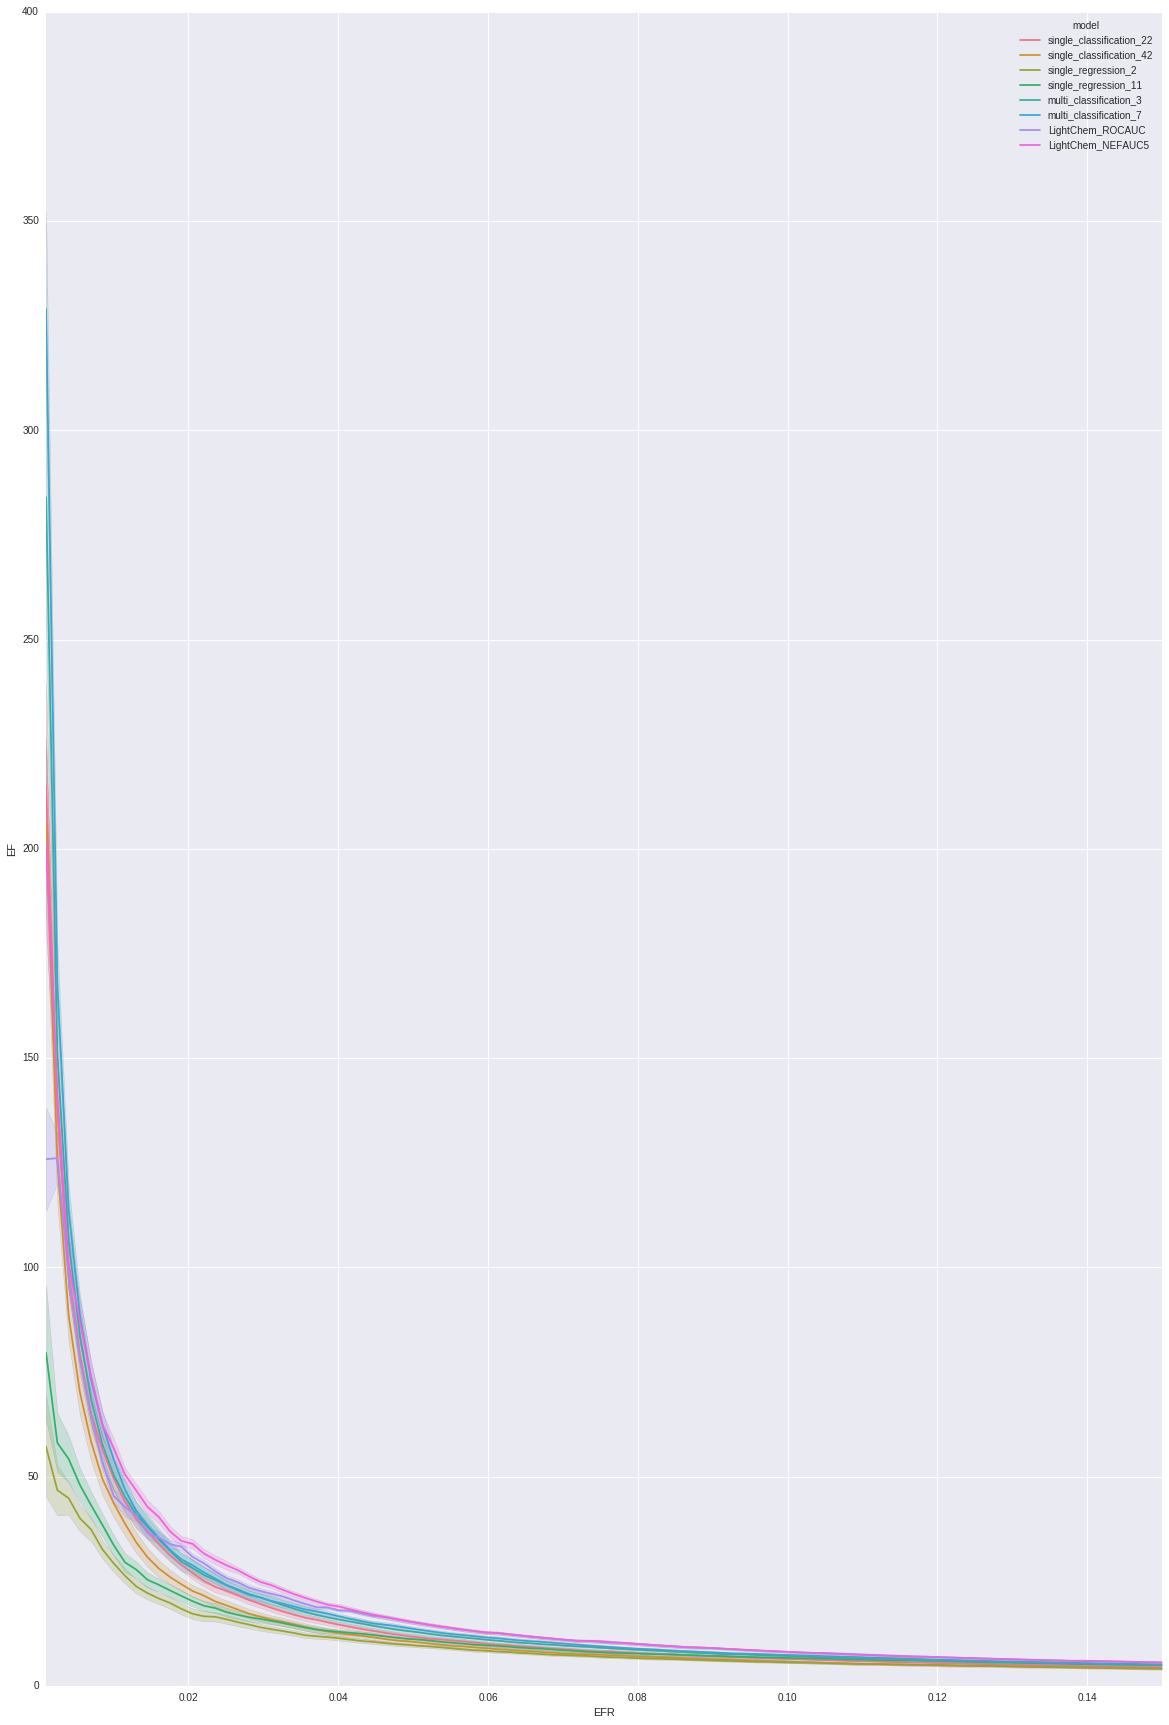

In [17]:

%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20.0, 30.0)

sns.tsplot(data=whole_pd, time="EFR", unit="running process", condition="model", value="EF")
plt.savefig('plottings/EF_curve.png')

# Normalized EF-Curve

Let $ R\% = EF_{ratio} \in [0\%, 100\%]$ is a pre-defined float number.

$EF = \frac{\text{# predicted pos in top R% samples}}{\text{# actual pos} \,\times\, R\%} $

$\text{EF max} = \frac{min\{ \text{# actual pos},\, \text{sample size} \,\times\, R\% \}}{\text{# actual pos} \,\times\, R\%} $

EF max represents when taking the ratio as $R\%$, at most EF max positives we can get.

$ \text{Normalized EF} = \frac{\text{EF}}{\text{EF max}}$

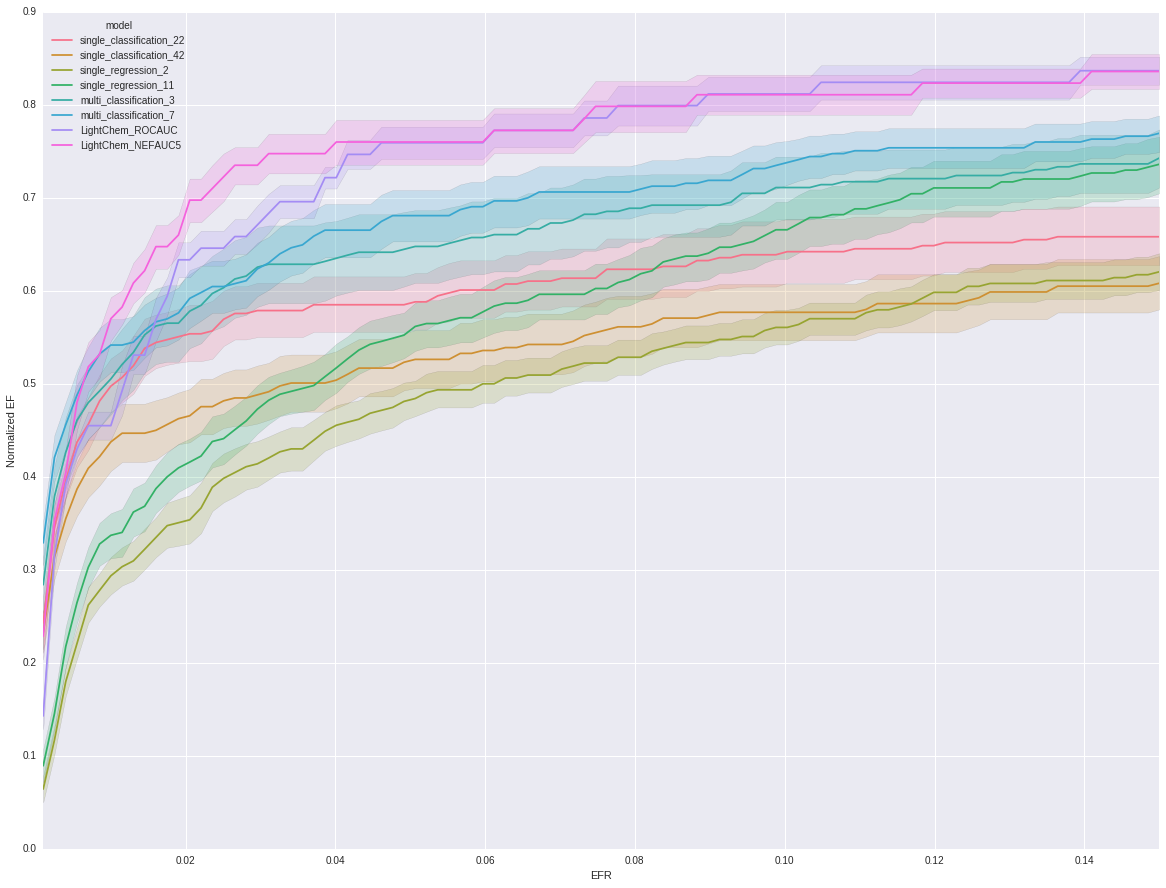

In [18]:
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20.0, 15.0)

# Calculate Normalized EF, and add it to dataframe
whole_pd['Normalized EF'] = whole_pd.apply(lambda row: row['EF'] / row['EF max'], axis=1)
sns.tsplot(data=whole_pd, time="EFR", unit="running process", condition="model", value="Normalized EF")
plt.savefig('plottings/NEF_curve.png')

# Save Figure

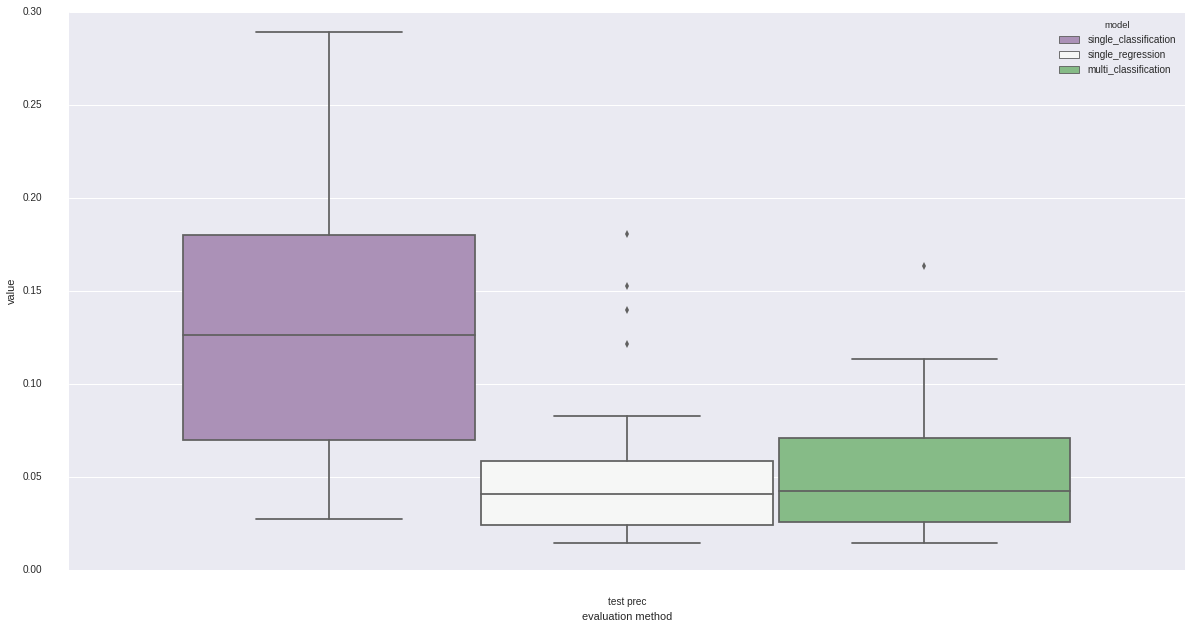

In [19]:
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)

file_paths = {0: 'single_classification_42/45539118/', 
              1: 'single_regression_11/45540958/',
              2: 'multi_classification_7/45555017/'}
paths = ['../../output/cross_validation/{}'.format(p) for p in file_paths.values()]

model_list = ['single_classification',
              'single_regression',
              'multi_classification']

plot_cross_validation(paths,
                      evaluation_list=[evaluations[6]],
                      model_list=model_list,
                      title='AUC[PR]', 
                      plot_mode='save')

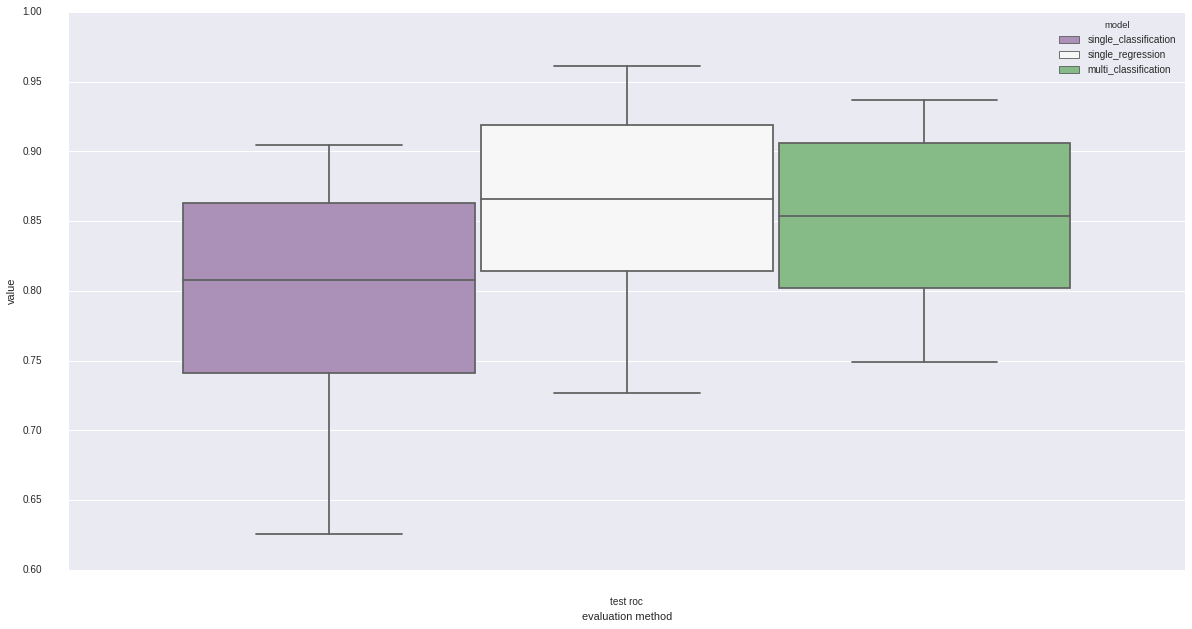

In [20]:
plot_cross_validation(paths,
                      evaluation_list=[evaluations[7]],
                      model_list=model_list,
                      title='AUC[ROC]', 
                      plot_mode='save')

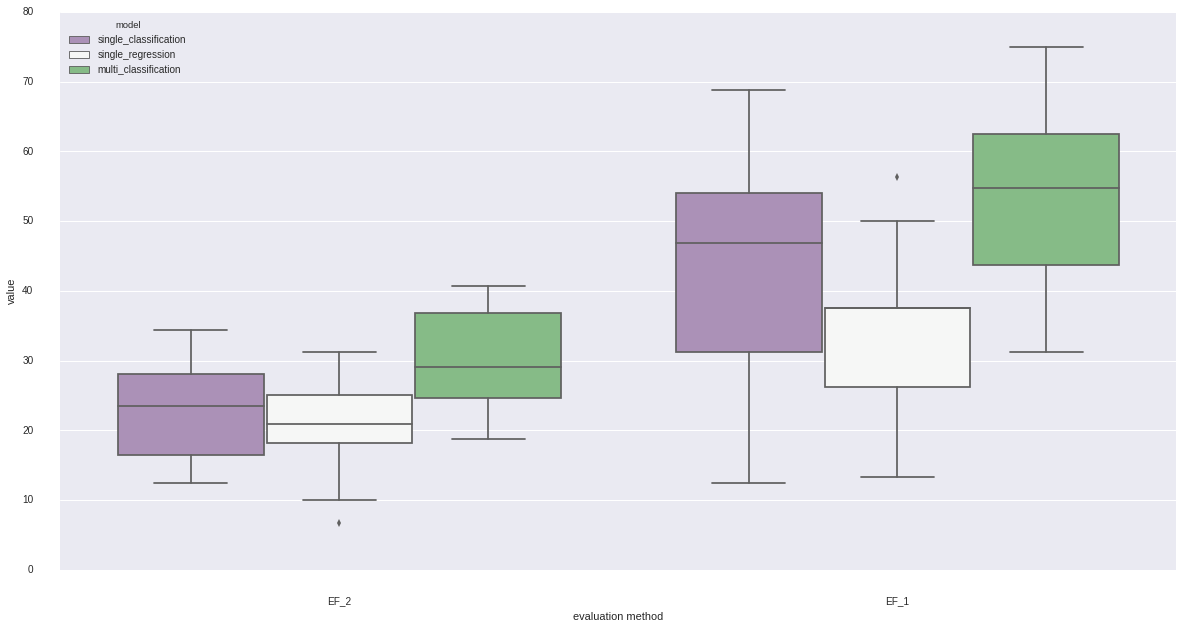

In [21]:
plot_cross_validation(paths,
                      evaluation_list=[evaluations[9], evaluations[10]],
                      model_list=model_list,
                      title='Enrichment Factor on Test Set', 
                      plot_mode='save')